Hey,what's going on.Well I am fine and here I am going to do some fun by generating my own songs lyrics
I will going to use text generation technique.Text Generation is a type of Language Modelling problem. Language Modelling is the core problem for a number of of natural language processing tasks such as speech to text, conversational system, and text summarization.
Text Generation is one such task which can be be architectured using deep learning models, particularly Recurrent Neural Networks.

Now first of all we are going to import libraries

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string, os 
import tensorflow as tf

# keras module for building LSTM 
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense, Bidirectional 
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# csv file
df = pd.read_csv('../input/scrapped-lyrics-from-6-genres/lyrics-data.csv')

In [3]:
# first few rows
df.head()

,ALink,SName,SLink,Lyric,Idiom
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH


So we are going to do text generation,we don't need require others column so we will drop it.But I am not going to drop Idiom column as I have to take english songs,so this column is require for subsetting the dataset 

In [4]:
# drop
df.drop(['ALink','SName','SLink'],axis=1,inplace=True)

In [5]:
# shape
df.shape

(209522, 2)

In [6]:
# value count
df['Idiom'].value_counts()

ENGLISH           114723
PORTUGUESE         85085
SPANISH             4812
ITALIAN              626
FRENCH               471
GERMAN               314
KINYARWANDA           88
ICELANDIC             47
SWEDISH               27
FINNISH               24
INDONESIAN            17
GALICIAN              12
ESTONIAN              12
IRISH                  9
HAITIAN_CREOLE         9
DANISH                 9
BASQUE                 8
NORWEGIAN              7
CROATIAN               7
TAGALOG                7
CATALAN                6
SUNDANESE              6
DUTCH                  5
SWAHILI                5
MALAY                  4
RUSSIAN                4
SERBIAN                3
JAPANESE               2
TURKISH                2
NYANJA                 2
SESOTHO                2
KURDISH                2
ARABIC                 2
CEBUANO                2
MALAGASY               2
WELSH                  1
KOREAN                 1
AFRIKAANS              1
ROMANIAN               1
GANDA                  1


Now I want to take only english songs,so I need to subset the dataset accordingly

In [7]:
# take only english songs
df = df[df['Idiom']=='ENGLISH']

I don't have much memory in this kaggle kernel.So we can't train the model on whole dataset.So I am going to take first 700 rows.If you have more memory in your local then go ahead and train the model on whole dataset

In [8]:
# take first 700 rows
df = df[:700]

In [9]:
# shape
df.shape

(700, 2)

# Data Visualization

In [10]:
df['Number_of_words'] = df['Lyric'].apply(lambda x:len(str(x).split()))
df.head()

,Lyric,Idiom,Number_of_words
0,I could feel at the time. There was no way of ...,ENGLISH,145
1,"Take me now, baby, here as I am. Hold me close...",ENGLISH,238
2,These are. These are days you'll remember. Nev...,ENGLISH,172
3,"A lie to say, ""O my mountain has coal veins an...",ENGLISH,263
4,Trudging slowly over wet sand. Back to the ben...,ENGLISH,118


In [11]:
# statistical info
df['Number_of_words'].describe()

count    700.000000
mean     251.608571
std       99.355784
min        9.000000
25%      178.000000
50%      246.000000
75%      309.000000
max      656.000000
Name: Number_of_words, dtype: float64

So from above we can see the max length is 656 and average song lyrics words length is 251

### Frequency distribution of number of words

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted')

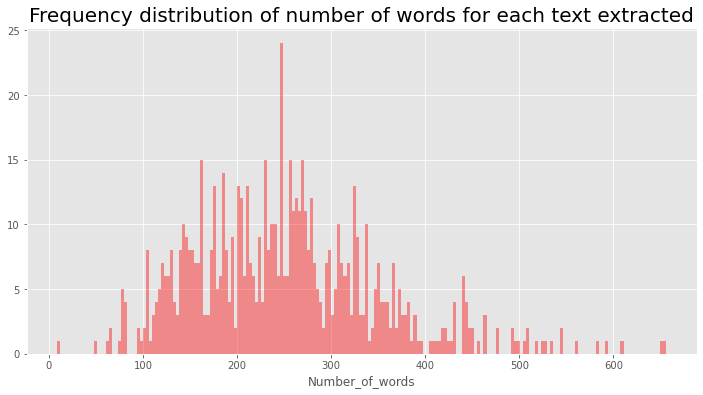

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(df['Number_of_words'],kde = False,color="red",bins=200)
plt.title("Frequency distribution of number of words for each text extracted", size=20)

# Data Preprocessing

First of all we are going to do tokenization then we will generate sequence of n-grams.After that we will going to do padding.Padding is required because all the sentences are of different length so we need to make them of same length.We will going to do this by adding 0 in the beginning of the text with the help of pad_sequences function of keras

In [13]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Lyric'].astype(str).str.lower())

total_words = len(tokenizer.word_index)+1
tokenized_sentences = tokenizer.texts_to_sequences(df['Lyric'].astype(str))
tokenized_sentences[0]

[2,
 75,
 67,
 81,
 1,
 32,
 74,
 53,
 41,
 60,
 10,
 565,
 1029,
 1080,
 9,
 1,
 154,
 92,
 35,
 52,
 76,
 312,
 1465,
 62,
 313,
 62,
 1,
 681,
 3607,
 1907,
 122,
 1,
 404,
 21,
 1,
 682,
 181,
 41,
 60,
 10,
 755,
 103,
 149,
 16,
 3,
 23,
 80,
 131,
 103,
 149,
 16,
 85,
 7,
 42,
 135,
 103,
 149,
 16,
 3,
 23,
 80,
 131,
 8,
 53,
 517,
 22,
 6,
 185,
 74,
 53,
 41,
 60,
 10,
 565,
 33,
 6,
 332,
 9,
 1,
 154,
 92,
 35,
 52,
 76,
 142,
 157,
 41,
 263,
 9,
 1,
 79,
 258,
 14,
 1907,
 122,
 1,
 404,
 21,
 1,
 682,
 181,
 41,
 60,
 10,
 755,
 103,
 149,
 16,
 3,
 23,
 80,
 131,
 103,
 149,
 16,
 85,
 7,
 42,
 135,
 103,
 149,
 16,
 3,
 23,
 80,
 131,
 103,
 149,
 16,
 3,
 23,
 80,
 131,
 103,
 149,
 16,
 85,
 7,
 42,
 135,
 103,
 149,
 16,
 80,
 131]

In [14]:
# Slash sequences into n gram sequence
input_sequences = list()
for i in tokenized_sentences:
    for t in range(1, len(i)):
        n_gram_sequence = i[:t+1]
        input_sequences.append(n_gram_sequence)
        
# Pre padding
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [15]:
input_sequences[:10]

array([[ 0,  0,  0, ...,  0,  2, 75],
       [ 0,  0,  0, ...,  2, 75, 67],
       [ 0,  0,  0, ..., 75, 67, 81],
       ...,
       [ 0,  0,  0, ..., 74, 53, 41],
       [ 0,  0,  0, ..., 53, 41, 60],
       [ 0,  0,  0, ..., 41, 60, 10]], dtype=int32)

For the model, we need to create predictors and label. We are going to create N-grams sequence as predictors and the next word of the N-gram as label. 

In [16]:
# create predictors and label
X, labels = input_sequences[:,:-1],input_sequences[:,-1]
y = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# Model

We will not going to create RNN model due to its vanishing gradient problem instead of that we will going to create LSTM model.LSTMs have an additional state called ‘cell state’ through which the network makes adjustments in the information flow. The advantage of this state is that the model can remember or forget the leanings more selectively.

In [17]:
# create model
model = Sequential()
model.add(Embedding(total_words, 40, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(250)))
model.add(Dropout(0.1))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')
history = model.fit(X, y, epochs=10, verbose=1, callbacks=[earlystop])

Epoch 1/10
5492/5492 [==============================] - 651s 117ms/step - loss: 6.3248 - accuracy: 0.0512
Epoch 2/10
5492/5492 [==============================] - 645s 117ms/step - loss: 5.2252 - accuracy: 0.1271
Epoch 3/10
5492/5492 [==============================] - 643s 117ms/step - loss: 4.4643 - accuracy: 0.2053
Epoch 4/10
5492/5492 [==============================] - 645s 117ms/step - loss: 3.8444 - accuracy: 0.2841
Epoch 5/10
5492/5492 [==============================] - 647s 118ms/step - loss: 3.3736 - accuracy: 0.3512
Epoch 6/10
5492/5492 [==============================] - 649s 118ms/step - loss: 3.0025 - accuracy: 0.4037
Epoch 7/10
5492/5492 [==============================] - 649s 118ms/step - loss: 2.7241 - accuracy: 0.4485
Epoch 8/10
5492/5492 [==============================] - 649s 118ms/step - loss: 2.5014 - accuracy: 0.4836
Epoch 9/10
5492/5492 [==============================] - 648s 118ms/step - loss: 2.3232 - accuracy: 0.5123
Epoch 10/10
5492/5492 [=======================

Increase the epochs to increase the accuracy.I haven't done that because it is taking a very long time

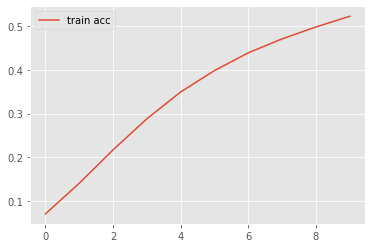

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Generate new song lyrics

Now our model is ready.So lets write the function to predict the next word based on the input words (or seed text). We will first tokenize the seed text, pad the sequences and pass into the trained model to get predicted word. The multiple predicted words can be appended together to get predicted sequence.

In [19]:
def complete_this_song(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

Our function is ready so are you ready to generate your own lyrics

In [20]:
complete_this_song("the sky is blue", 40)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


"the sky is blue to the water the sky the pain that lies you will take me the lowly one and i hope that you don't know who i am and taught me how it i am but where i had to look to"

In [21]:
complete_this_song("This is the beginning", 140)

"This is the beginning of the end and i still take the way i feel the way i feel inside and i promise to be the one to the world i think about the pain i feel tonight and i feel the one to lead my mind i know where i need to be the one to the one to the sky i think about the pain i feel tonight and i know i need you to you know i get the best of me i can't believe i trusted every word you said it's the only thing that you love and i know i need you to take a right home and i hope that i don't fall in the valley of california i've been a new card i don't believe to be scared to the end of the end of the world"

In [22]:
complete_this_song("I am missing you", 80)

"I am missing you for me i'm not blind to be here but i don't have to the life but i know that i had sworn i'd never let you go and i never did i said i'd never let you go and i never did i said i'd never let you go and i never did i said i'd never let you go and i never did i said i'd never let you go and i never did i said i'd never let"

# Save the model

In [23]:
# save model
from tensorflow.keras.models import load_model
model.save('song_lyrics_generator.h5')

**Well that's done, in future I am going to update this notebook after learning more about text generation and don't forget to upvote it if you like it**
